Computed coefficients using formula:
c = 32.6429
m = 0.0357


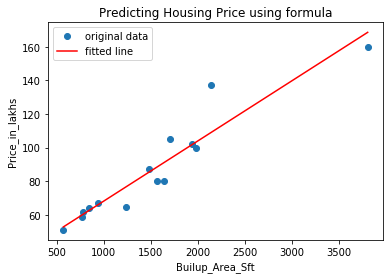

Predicting Housing Price--> using Linear Regression Method with formula: 68.3512

Computed coefficients using python library:
c = 32.6429
m = 0.0357


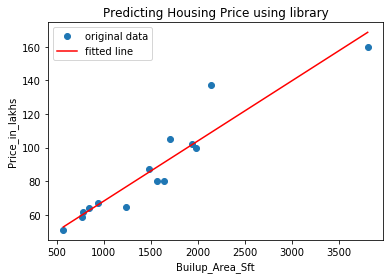

Predicting Housing Price--> using Linear Regression Method with library: 68.3512


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def mean(x):
    sum = 0.0
    for i in x:
         sum += i
    return float(sum / len(x))

def estimate_coef(x, y):
    # size of array
    n = len(x)

    #computing  mean of x and y
    mean_x = mean(x)
    mean_y = mean(y)

    Sum_xy_Dev = np.sum(y * x) - n * mean_y * mean_x
    Sum_xx_Dev = np.sum(x * x) - n * np.power(mean_x,2)

    # calculating regression coefficients m & c
    m = Sum_xy_Dev / Sum_xx_Dev
    c = mean_y - m * mean_x

    return (c, m)

def ScatterPlot(x, y, b, x_axis, y_axis, Title):

    # predicted response vector
    y_pred = b[0] + b[1] * x

    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, y_pred, 'r', label='fitted line')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(Title)
    plt.legend()
    plt.show()


def LinearRegressionSolution(FileName, x_axis, y_axis, Title, sft):
    df = pd.read_csv(FileName, dtype={x_axis: float, y_axis: float})
    x = df[x_axis]
    y = df[y_axis]

    # Computing coefficients m & c
    b = estimate_coef(x, y)
    print("Computed coefficients using formula:")
    print("c = %.4f" %b[0])
    print("m = %.4f" %b[1])

    # plotting regression line
    ScatterPlot(x, y, b, x_axis, y_axis, Title+" using formula")

    #predict price for the 1000 sft
    predicted_price = b[1] * sft + b[0]
    print(Title + '--> using Linear Regression Method with formula: %.4f' % predicted_price)
    print()

    #Linear regression using Python library
    m_slope, c_intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("Computed coefficients using python library:")
    print("c = %.4f" % c_intercept)
    print("m = %.4f" % m_slope)

    ScatterPlot(x, y, b, x_axis, y_axis, Title+" using library")
    #predict price for the 1000 sft
    predicted_price_using_library = m_slope * sft + c_intercept
    print(Title + '--> using Linear Regression Method with library: %.4f' % predicted_price_using_library)

#predicted price for 1000 sft using linear regression for a given dataset
sft = 1000
LinearRegressionSolution("regression.csv", "Builup_Area_Sft", "Price_in_lakhs", "Predicting Housing Price", sft)


